In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [85]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [86]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [88]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [89]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### 1. Attrition distribution

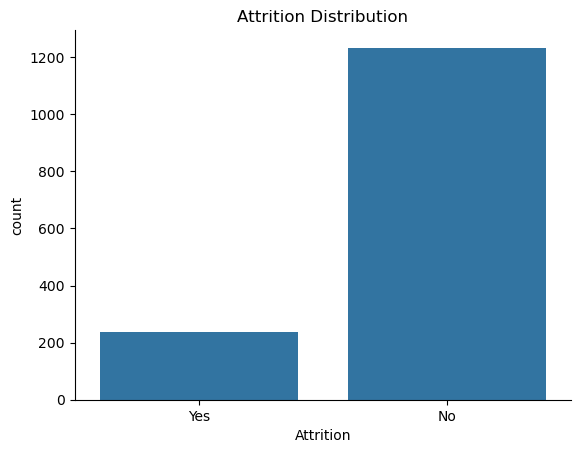

In [78]:
sns.countplot(data=df, x='Attrition')
plt.title('Attrition Distribution')
sns.despine(top=True, right=True)
plt.show()


### 2. Attrition by 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime' (Categorical Value)

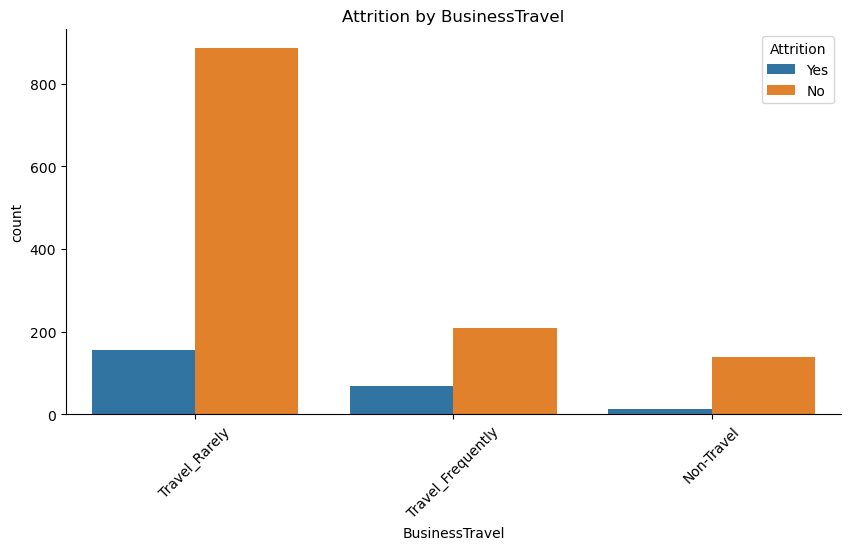

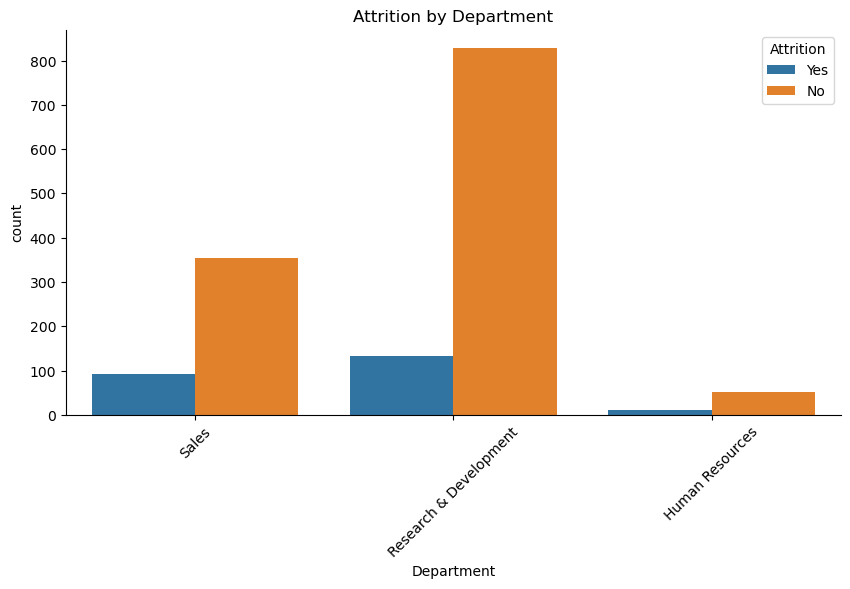

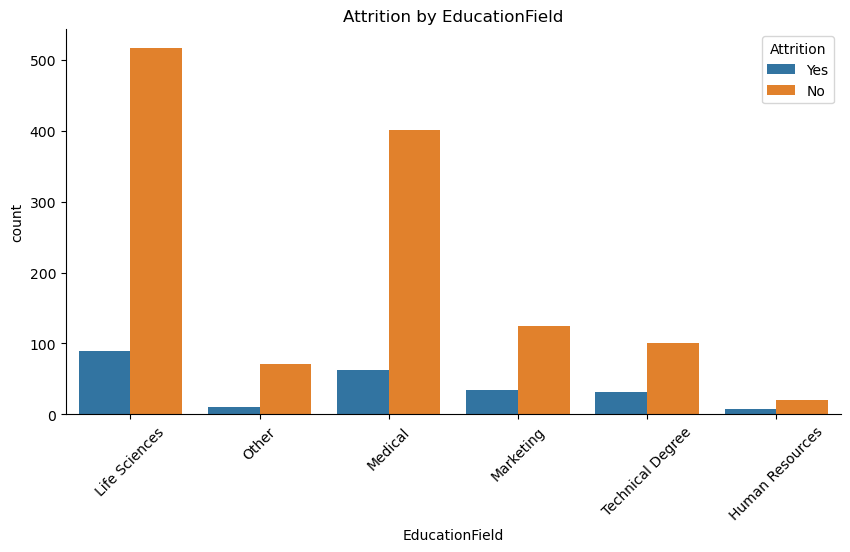

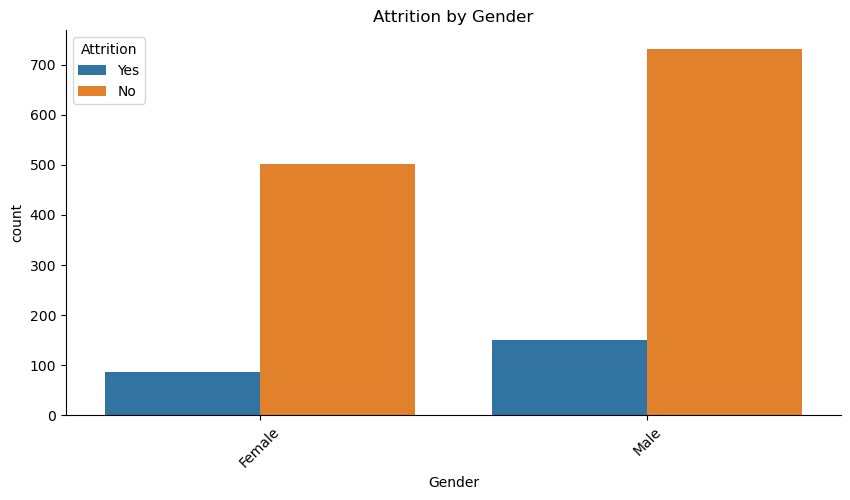

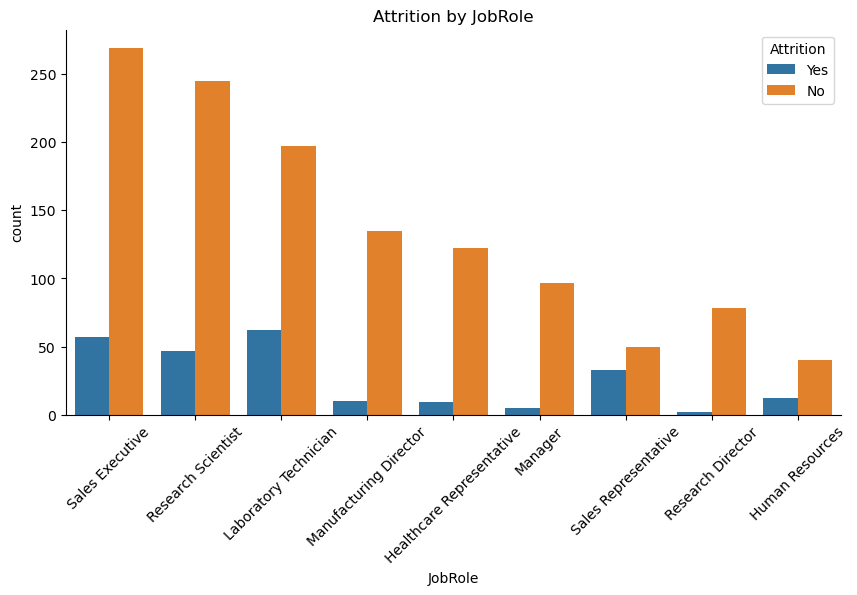

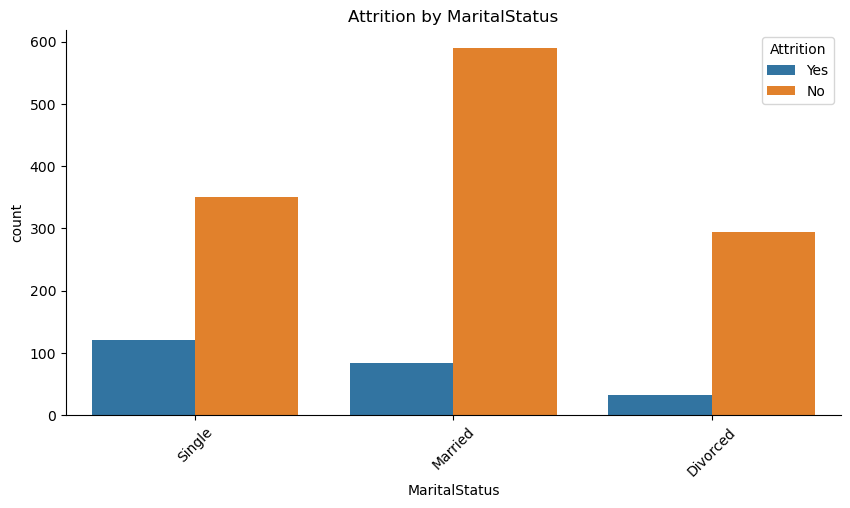

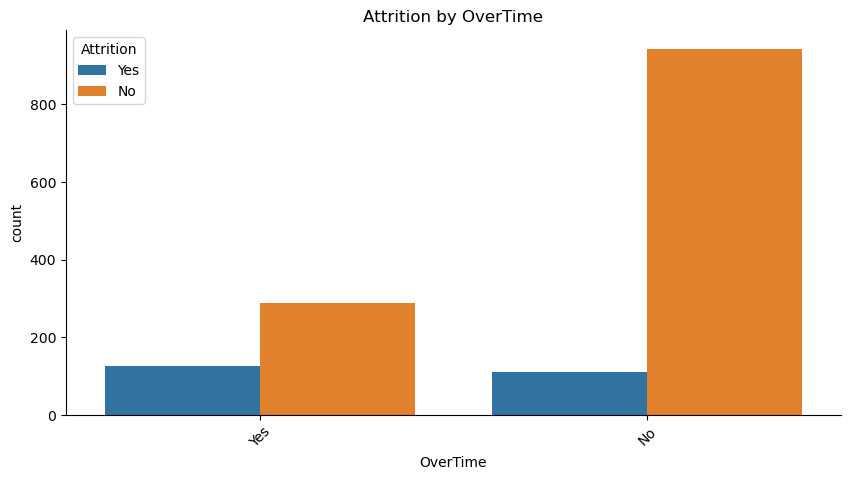

In [40]:
# Categorical columns
cat_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 
            'JobRole', 'MaritalStatus', 'OverTime']

# Plot countplots with attrition breakdown
for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, hue='Attrition', data=df)
    plt.xticks(rotation=45)
    plt.title(f"Attrition by {col}")
    sns.despine(top=True, right=True)
    plt.show()

### 3. Attrition by 'Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany', 'YearsSinceLastPromotion' (Numerical Value)

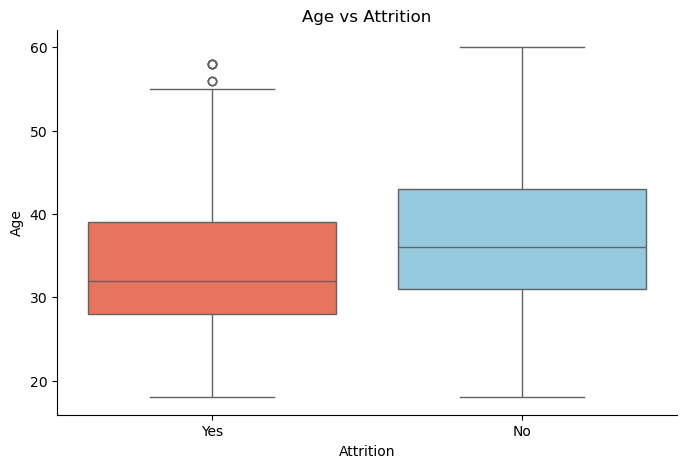

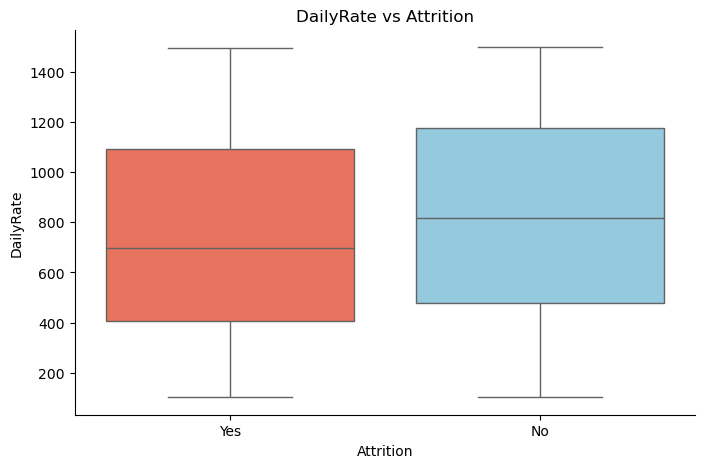

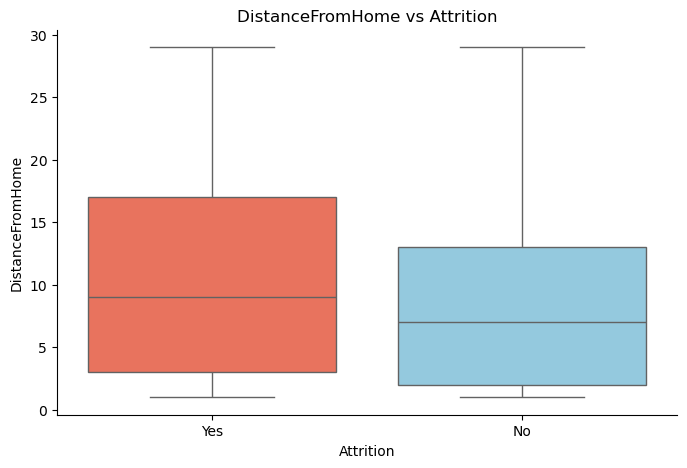

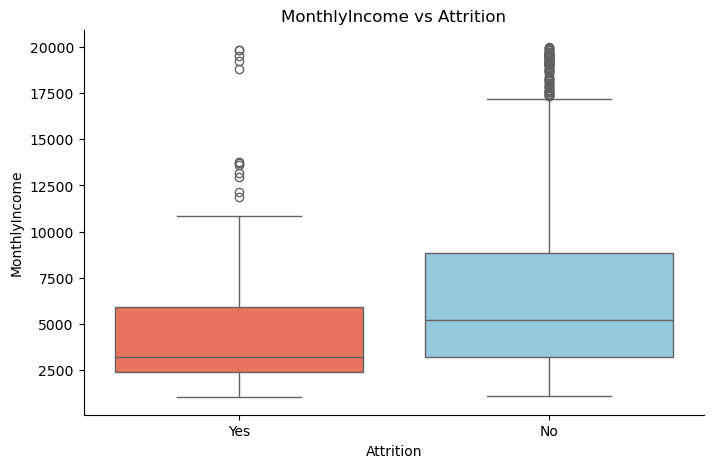

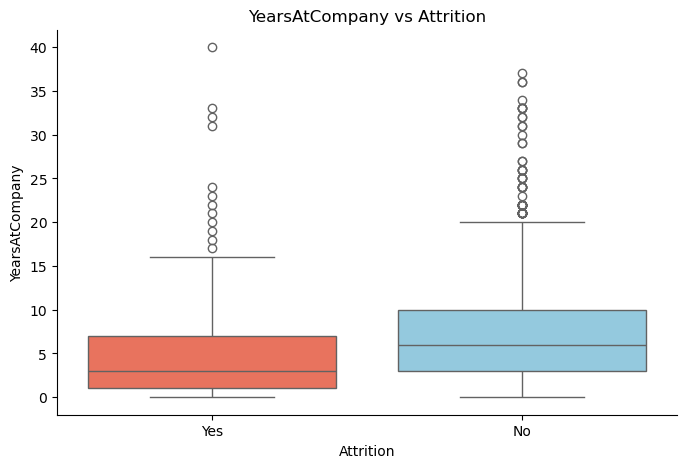

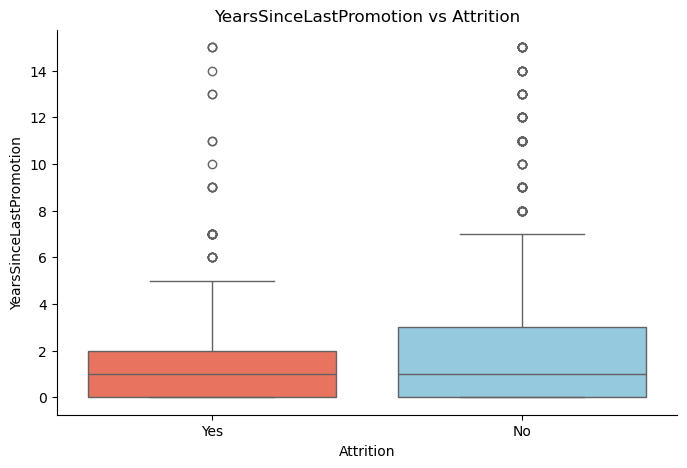

In [41]:
# Boxplots for numerical features with proper palette and hue
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Attrition', y=col, data=df,
                hue='Attrition', palette={'Yes': 'tomato', 'No': 'skyblue'}, dodge=False)
    plt.title(f"{col} vs Attrition")
    plt.legend([], [], frameon=False)
    sns.despine(top=True, right=True)
    plt.show()


### 4. Co-relation heatmap between numerical values

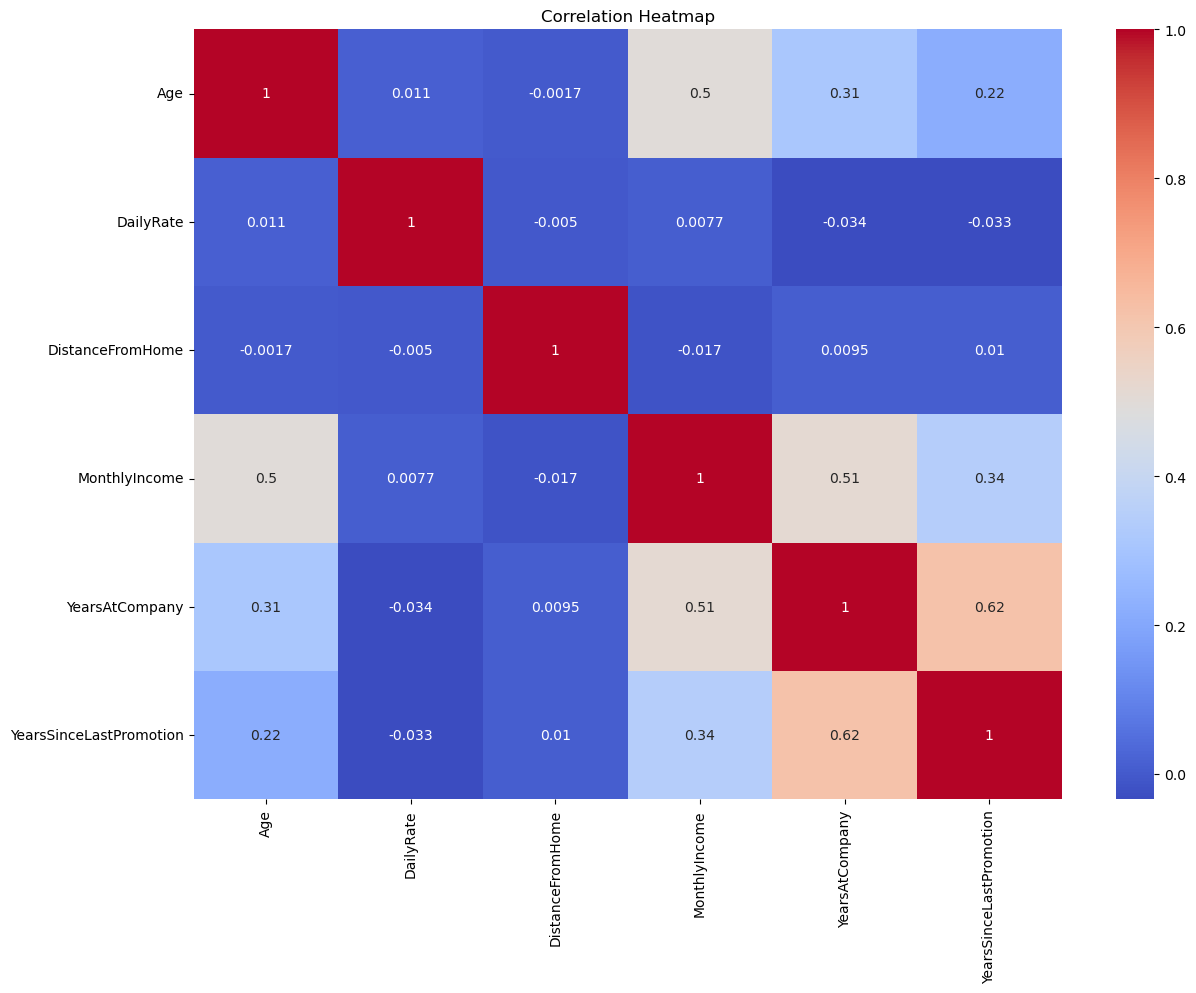

In [35]:
plt.figure(figsize=(14,10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Train Test and Split

### Drop the unnecessary column

In [90]:
df.drop(columns=['EmployeeCount', 'EmployeeNumber'], inplace=True)

In [91]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

### Converting categorical value into numerical value (One-hot encode categorical features)

In [92]:
df = pd.get_dummies(df, drop_first=True)

In [94]:
X = df.drop('Attrition', axis = 1)

In [95]:
y = df['Attrition']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

### Standardize for logistic regression

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic regression

In [102]:
lr_model = LogisticRegression()

In [103]:
lr_model

LogisticRegression()

### Fit the data into lr_model

In [104]:
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [111]:
y_pred_lr = lr_model.predict(X_test_scaled)

In [112]:
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

In [120]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Receiver Operating Characteristic Area Under the Curve")
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_lr))


Logistic Regression
[[119   4]
 [ 17   7]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       123
           1       0.64      0.29      0.40        24

    accuracy                           0.86       147
   macro avg       0.76      0.63      0.66       147
weighted avg       0.84      0.86      0.83       147

Receiver Operating Characteristic Area Under the Curve
ROC AUC Score: 0.7872628726287262


### Create a Series of coefficients sorted by absolute value (ascending for readability)

In [125]:
coefs = pd.Series(lr_model.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)

### Bar graph showing which features affect the predictive model the most (i.e., feature importance).

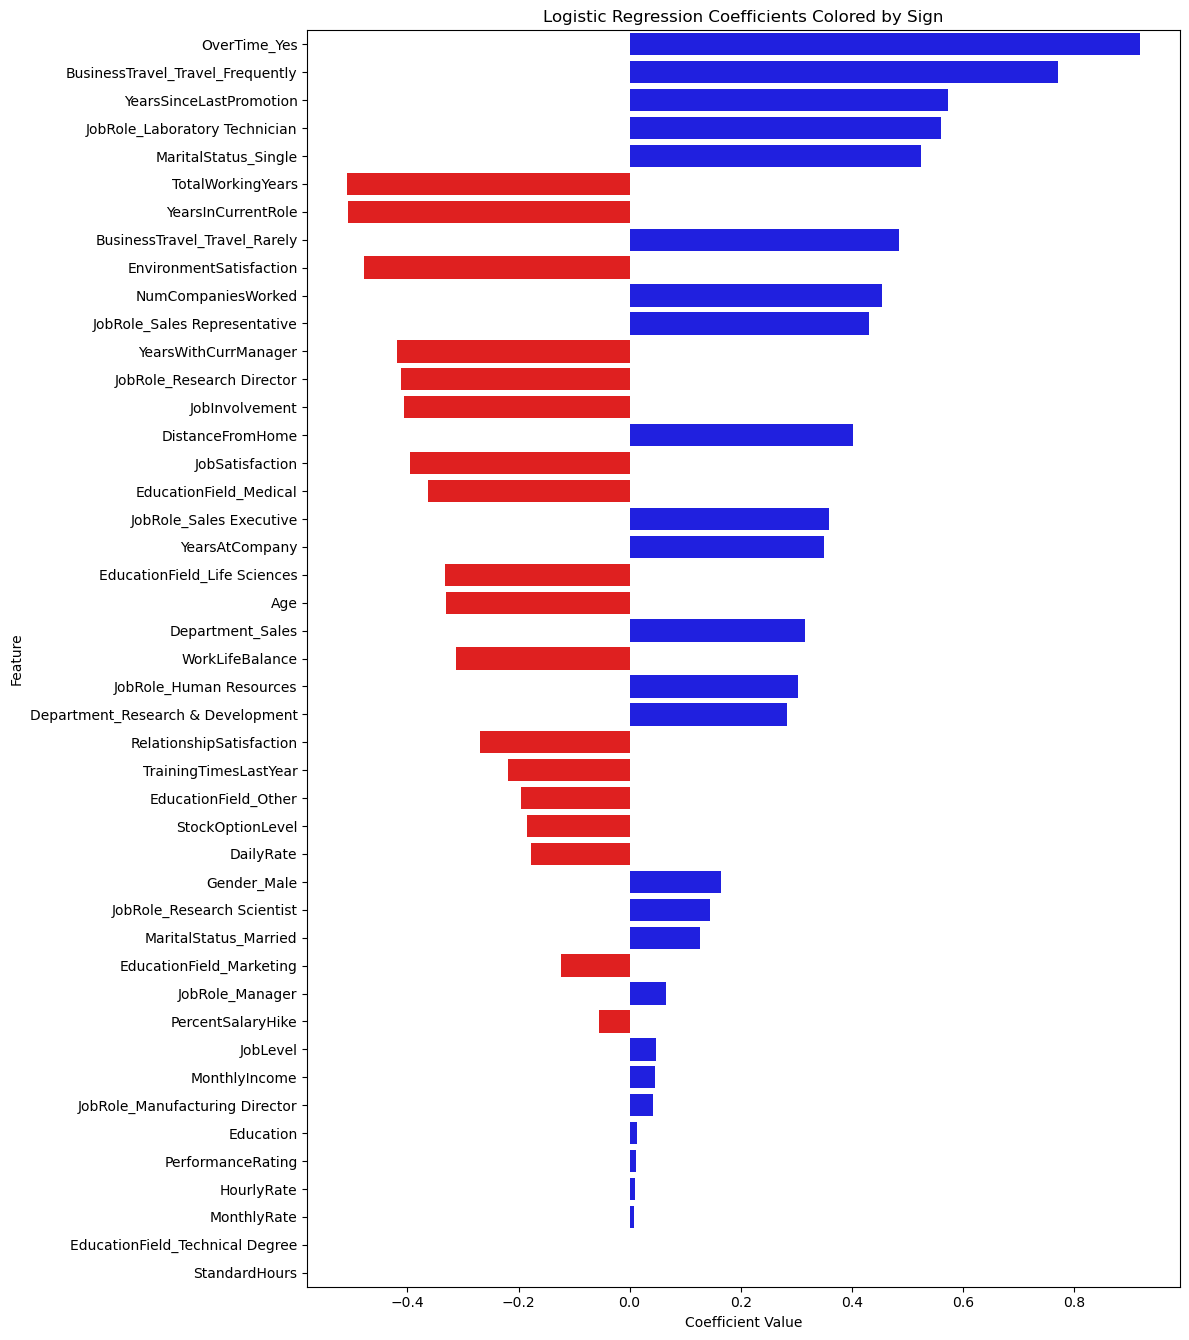

In [130]:
# Prepare DataFrame for seaborn
df_coefs = coefs.reset_index()
df_coefs.columns = ['Feature', 'Coefficient']

# Add a column for sign to use as hue
df_coefs['Sign'] = df_coefs['Coefficient'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')

plt.figure(figsize=(12, max(6, 0.3 * len(coefs))))
sns.barplot(data=df_coefs, x='Coefficient', y='Feature', hue='Sign', dodge=False,
            palette={'Positive': 'blue', 'Negative': 'red'})

plt.title('Logistic Regression Coefficients Colored by Sign')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

